<a href="https://colab.research.google.com/github/sujasna/sujasna/blob/main/S%26P_500_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import panel as pn
import pandas as pd
from pandas_datareader import data
import pandas_datareader.data as web
import numpy as np
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import param
import requests
import time
import datetime
import altair as alt
import seaborn as sns

## **Downloading & Cleaning Data**

In [ ]:
# S&P 500 Index Price
sp500_total_price = yf.download("^GSPC")
sp500_total_price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-03-18,5154.770020,5175.600098,5145.470215,5149.419922,5149.419922,4036220000
2024-03-19,5139.089844,5180.310059,5131.589844,5178.509766,5178.509766,4031760000
2024-03-20,5181.689941,5226.189941,5171.549805,5224.620117,5224.620117,4064850000


In [ ]:
# S&P 500 Ticker Information
sp500_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
sp500_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
# S&P 500 Ticker List
sp500_tickers = sp500_df["Symbol"].tolist()

# Revised ticker name manually due to different name format
sp500_tickers[sp500_tickers.index("BF.B")] = "BF-B"
sp500_tickers[sp500_tickers.index("BRK.B")] = "BRK-B"

In [ ]:
# Downloading price data
price = yf.download(sp500_tickers)["Adj Close"]

[*********************100%%**********************]  503 of 503 completed


In [ ]:
# Pivoting price dataframe
price_pivot = pd.DataFrame()

for ticker in sp500_tickers:
    # Download historical data for each ticker
    df = yf.download(ticker)  # Customize your date range

    # Reset index to get the Date column
    df = df.reset_index()

    # Defining 'Name' column
    df["Name"] = ticker

    # Append the data to the main DataFrame
    price_pivot = pd.concat([price_pivot, df], ignore_index=True)

# Show the first few rows of the DataFrame
print(price_pivot.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

        Date  Open      High       Low     Close  Adj Close  Volume Name
0 1962-01-02   0.0  4.250000  4.125000  4.156250   0.691337  212800  MMM
1 1962-01-03   0.0  4.187500  4.085938  4.187500   0.696535  422400  MMM
2 1962-01-04   0.0  4.257813  4.187500  4.187500   0.696535  212800  MMM
3 1962-01-05   0.0  4.171875  4.062500  4.078125   0.678342  315200  MMM
4 1962-01-08   0.0  4.085938  4.031250  4.054688   0.674444  334400  MMM


In [ ]:
# Initialize a list to store your data
shares = []

# Loop through the tickers and get the info
for ticker in sp500_tickers:
    ticker_obj = yf.Ticker(ticker)
    try:
        info = ticker_obj.info
        shares_outstanding = info.get('sharesOutstanding', "N/A")
        shares.append({'Name': ticker, 'SharesOutstanding': shares_outstanding})
    except Exception as e:
        print(f"Could not retrieve data for {ticker}: {e}")

# Convert the list to a DataFrame
shares = pd.DataFrame(shares)

In [ ]:
current = price_pivot.loc[price_pivot["Date"] == price_pivot["Date"].max()]
current = pd.merge(current, shares, on="Name")
current = current[['Date','Name','Open','High','Low','Close','Adj Close','Volume','SharesOutstanding']]
current["Market Cap"] = current["Adj Close"] * current["SharesOutstanding"]
current

,Date,Name,Open,High,Low,Close,Adj Close,Volume,SharesOutstanding,Market Cap
0,2024-03-22,MMM,107.599998,108.120003,106.750000,106.779999,106.779999,4447900,552700032,5.901731e+10
1,2024-03-22,AOS,89.540001,89.820000,88.940002,89.279999,89.279999,1008400,121176000,1.081859e+10
2,2024-03-22,ABT,111.519997,111.980003,110.540001,110.570000,110.570000,5387100,1735180032,1.918589e+11
3,2024-03-22,ABBV,177.229996,178.990005,176.779999,178.449997,178.449997,4084000,1770649984,3.159725e+11
4,2024-03-22,ACN,350.329987,350.470001,335.790009,337.500000,337.500000,5899300,628729024,2.121960e+11
...,...,...,...,...,...,...,...,...,...,...
498,2024-03-22,XYL,129.929993,130.479996,128.770004,129.210007,129.210007,732400,241770000,3.123910e+10
499,2024-03-22,YUM,136.610001,136.720001,135.649994,136.229996,136.229996,1296400,281336000,3.832640e+10
500,2024-03-22,ZBRA,293.869995,293.869995,290.160004,291.440002,291.440002,201800,51381400,1.497460e+10
501,2024-03-22,ZBH,127.269997,127.650002,125.879997,127.199997,127.199997,1419200,205084000,2.608668e+10


## **S&P500 Index Price Trendline **

In [ ]:
mark1000 = sp500_total_price[sp500_total_price["Adj Close"] == sp500_total_price["Adj Close"].loc[lambda x : (x >= 1000)][0]]
mark4000 = sp500_total_price[sp500_total_price["Adj Close"] == sp500_total_price["Adj Close"].loc[lambda x : (x >= 4000)][0]]
mark5000 = sp500_total_price[sp500_total_price["Adj Close"] == sp500_total_price["Adj Close"].loc[lambda x : (x >= 5000)][0]]

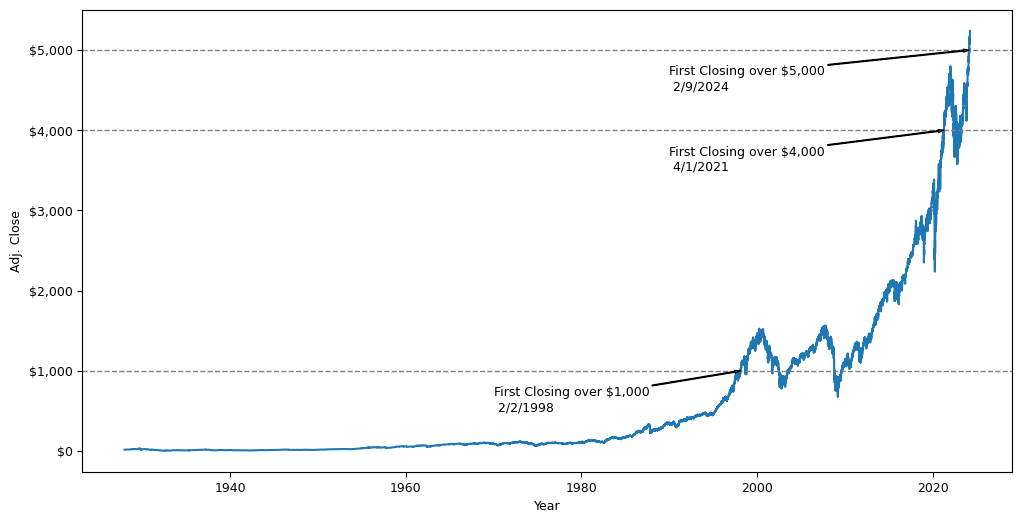

In [ ]:
mark5000 = sp500_total_price[sp500_total_price["Adj Close"] == sp500_total_price["Adj Close"].loc[lambda x : (x >= 5000)][0]]
xytext_date1 = pd.to_datetime("1970-01-01")
xytext_date2 = pd.to_datetime("1990-01-01")
xytext_date3 = pd.to_datetime("1990-01-01")

def y_axis_formatter(value, pos):
  return "${:,.0f}".format(value)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(sp500_total_price.index, sp500_total_price["Adj Close"])
ax.set_xlabel("Year")
ax.set_ylabel("Adj. Close")
formatter = FuncFormatter(y_axis_formatter)
ax.yaxis.set_major_formatter(formatter)

# Adding a horizantal line
ax.axhline(y=1000, color="gray", linestyle="--", linewidth=1, label="Value = 1000")
ax.axhline(y=4000, color="gray", linestyle="--", linewidth=1, label="Value = 4000")
ax.axhline(y=5000, color="gray", linestyle="--", linewidth=1, label="Value = 5000")

ax.annotate("First Closing over $1,000\n 2/2/1998",
            xy=(mark1000.index, 1000), xytext=(xytext_date1, 500),
            arrowprops=dict(headwidth=2, width=0.5, headlength=4)
           )

ax.annotate("First Closing over $4,000\n 4/1/2021",
            xy=(mark4000.index, 4000), xytext=(xytext_date2, 3500),
            arrowprops=dict(headwidth=2, width=0.5, headlength=4)
           )

ax.annotate("First Closing over $5,000\n 2/9/2024",
            xy=(mark5000.index, 5000), xytext=(xytext_date3, 4500),
            arrowprops=dict(headwidth=2, width=0.5, headlength=4)
           )

plt.show()

## **S&P500 Index Annual Return - **

In [ ]:
annual_data = sp500_total_price["Adj Close"].resample("Y").last()

# Calculate annual returns
annual_returns = annual_data.pct_change()

annual_returns_df = annual_returns.reset_index()
annual_returns_df.columns = ["Year", "Returns"]
annual_returns_df["Year"] = annual_returns_df["Year"].dt.year

# Creating annual return chart with interactive tooltip
chart = alt.Chart(annual_returns_df).mark_bar().encode(
    x="Year:O",
    y="Returns:Q",
    color=alt.condition(
        alt.datum.Returns > 0,
        alt.value("green"),
        alt.value("red")
    ),
    tooltip=[alt.Tooltip('Year:O', title='Year'), alt.Tooltip('Returns:Q', title='Returns', format='.2f')]
).properties(
    width=1200,
    height=400
)

chart

alt.Chart(...)

In [ ]:
annual_returns_df["Returns"].mean()

0.07871734474176605

# **Comparison of S&P 500 performance for all historical events**

In [ ]:
# Define the start and end dates
start_date = "1950-01-01"
end_date = "2023-01-01"

# Download the S&P 500 data
sp500 = yf.download("^GSPC", start=start_date, end=end_date)

# Define the historical events and their corresponding dates
events = [
    ("Korean War", "1950-06-25"),
    ("Vietnam War", "1955-11-01"),
    ("Cuban Missile Crisis", "1962-10-22"),
    ("Oil Crisis", "1973-10-16"),
    ("Black Monday", "1987-10-19"),
    ("Dot-com bubble", "2000-03-10"),
    ("Financial Crisis", "2008-09-15"),
    ("COVID-19 Pandemic", "2020-03-11"),
]

# Calculate the S&P 500 performance for each event
sp500_performance = []
for event, date in events:
    event_start = sp500.index.get_loc(date, method="nearest")
    event_end = sp500.index.get_loc((pd.to_datetime(date) + pd.DateOffset(years=1)).strftime('%Y-%m-%d'), method="nearest")
    performance = (sp500["Adj Close"].iloc[event_end] / sp500["Adj Close"].iloc[event_start] - 1) * 100
    sp500_performance.append(performance)

# Create a DataFrame for events and performance
df = pd.DataFrame({"event": [event[0] for event in events], "performance": sp500_performance, "date": [event[1] for event in events]})

# Sort the events by date
df = df.sort_values("date")

# Create an Altair plot
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X("event:N", title="Event", sort=list(df["event"])),
    y=alt.Y("performance:Q", title="Performance (%)"),
    color=alt.Color("event:N", title="Event"),
).properties(
    width=600,
    height=400,
)

# Annotate the year for every event
text = chart.mark_text(
    align='center',
    baseline='middle',
    dy=-15,  # Nudges text upward so it doesn't appear on top of the bar
    color='black'
).encode(
    text='date:T'
)

# Combine the chart and the text
(chart + text).interactive()


[*********************100%%**********************]  1 of 1 completed
<ipython-input-32-7f4f0464f205>:23: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  event_start = sp500.index.get_loc(date, method="nearest")
<ipython-input-32-7f4f0464f205>:24: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  event_end = sp500.index.get_loc((pd.to_datetime(date) + pd.DateOffset(years=1)).strftime('%Y-%m-%d'), method="nearest")


alt.LayerChart(...)

## **Correlation Matrix of the Sectors for the COVID-19 Period**

[*********************100%%**********************]  10 of 10 completed


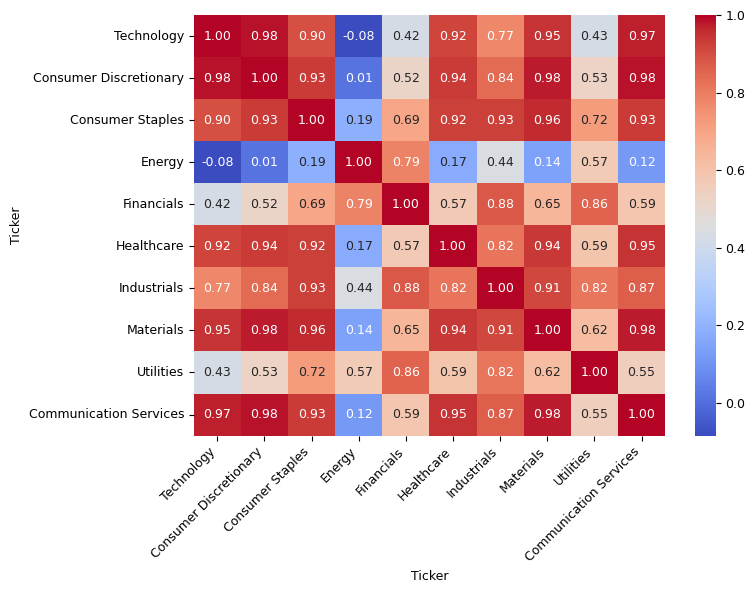

In [ ]:
# Define the start and end dates for the COVID-19 period
start_date = "2020-01-01"
end_date = "2020-12-31"

# Download the S&P 500 sector ETFs
sp500_sectors = ["XLK", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLU", "XLC"]
sector_data = yf.download(sp500_sectors, start=start_date, end=end_date)["Adj Close"]

# Create a dictionary to map the ticker symbols to their sector names
sector_names = {
    "XLK": "Technology",
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLF": "Financials",
    "XLV": "Healthcare",
    "XLI": "Industrials",
    "XLB": "Materials",
    "XLU": "Utilities",
    "XLC": "Communication Services"
}

# Create a DataFrame from the sector data and assign the sector names as the column labels
sector_data = pd.DataFrame(sector_data).rename(columns=sector_names)

# Sort the columns of sector_data to match the order of sector_names
ordered_columns = [sector_names[ticker] for ticker in sp500_sectors]
sector_data = sector_data[ordered_columns]

# Calculate the correlation matrix
correlation_matrix = sector_data.corr()

# Create a heatmap with improved label spacing
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_xticklabels(ordered_columns, rotation=45, ha='right')
plt.rcParams.update({'font.size': 9})
plt.tight_layout()
plt.show()


## **Measurement of Volatility of S&P 500 Sectors during Covid-19**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


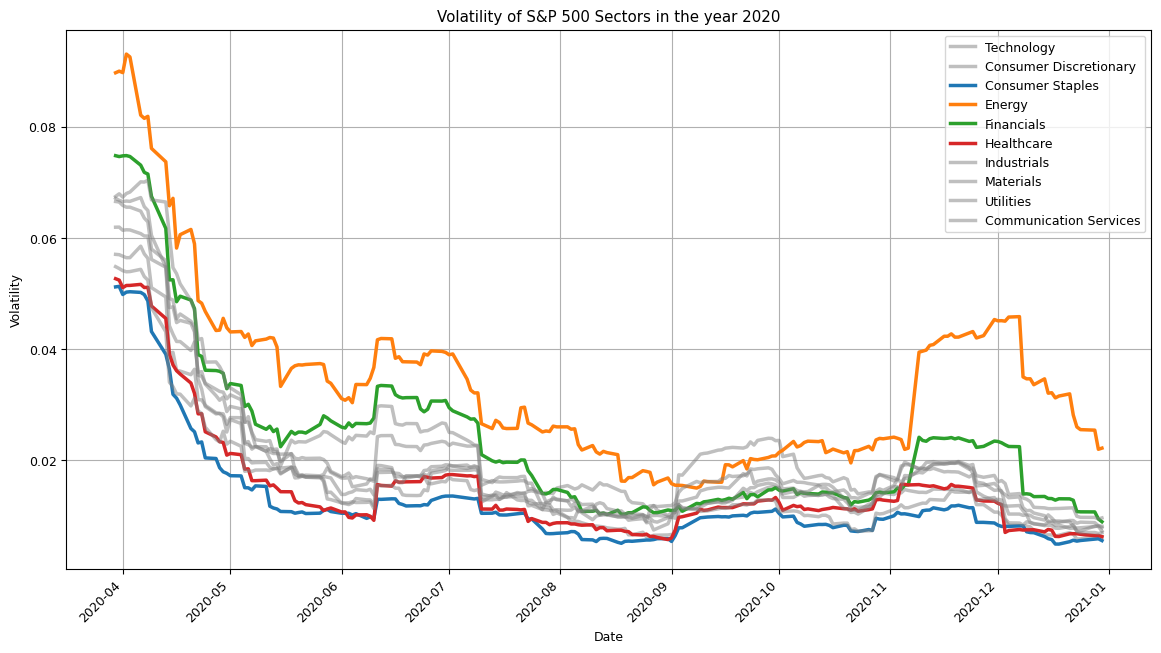

In [ ]:
# Define the start and end dates for the COVID-19 period
start_date = "2020-03-01"
end_date = "2020-12-31"

# Create a mapping dictionary for sector names
sector_names = {
    "XLK": "Technology",
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLF": "Financials",
    "XLV": "Healthcare",
    "XLI": "Industrials",
    "XLB": "Materials",
    "XLU": "Utilities",
    "XLC": "Communication Services",
}

# Download the S&P 500 sector ETFs
sp500_sectors = ["XLK", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLU", "XLC"]

# Initialize a dictionary to hold dataframes for each sector
sector_dfs = {}

# Download data for each sector and calculate rolling volatility
for sector in sp500_sectors:
    sector_data = yf.download(sector, start=start_date, end=end_date)["Adj Close"]
    sector_returns = sector_data.pct_change()
    rolling_volatility = sector_returns.rolling(window=20).std()
    sector_dfs[sector] = rolling_volatility

# Plotting each sector's rolling volatility as a line graph
plt.figure(figsize=(14,7))
highlight_sectors = ["XLE", "XLF", "XLP", "XLV"]
for sector, df in sector_dfs.items():
    if sector in highlight_sectors:
        plt.plot(df.index, df, linewidth=2.5, label=sector_names.get(sector, sector))
    else:
        plt.plot(df.index, df, linewidth=2.5, label=sector_names.get(sector, sector), color='gray', alpha=0.5)

# Modify labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Volatility of S&P 500 Sectors in the year 2020")

plt.grid(True)
plt.legend()
plt.show()

[*********************100%%**********************]  10 of 10 completed


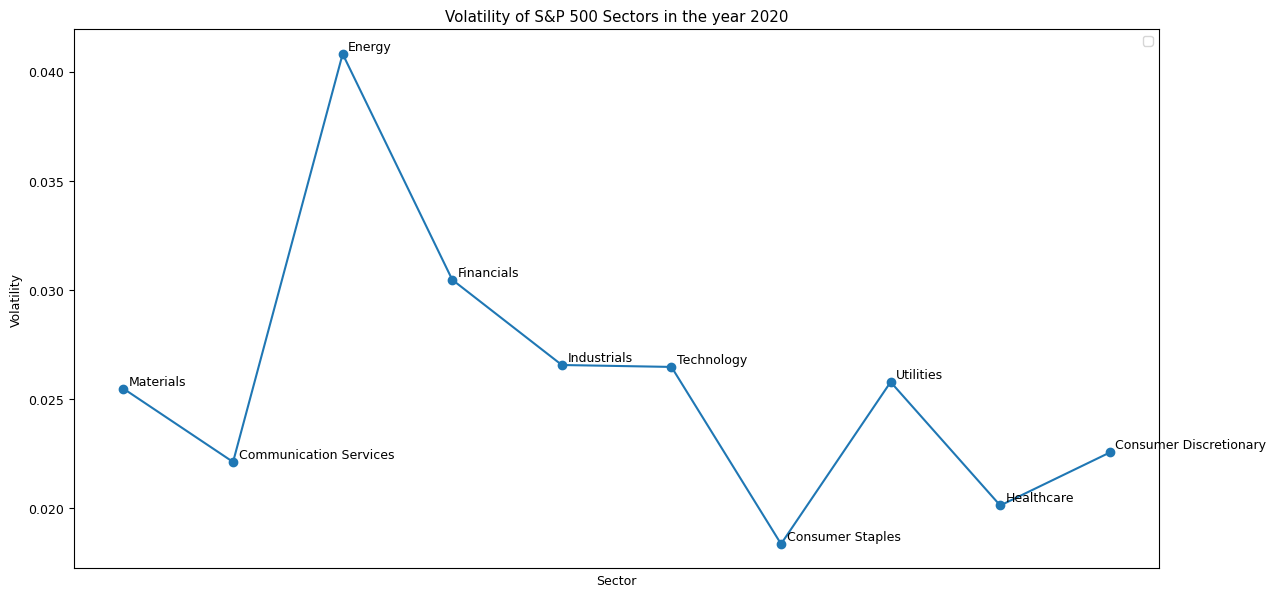

In [ ]:
# Define the start and end dates for the COVID-19 period
start_date = "2020-03-01"
end_date = "2020-12-31"

# Create a mapping dictionary for sector names
sector_names = {
    "XLK": "Technology",
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLF": "Financials",
    "XLV": "Healthcare",
    "XLI": "Industrials",
    "XLB": "Materials",
    "XLU": "Utilities",
    "XLC": "Communication Services",
    "XLY": "Consumer Discretionary",
}

# Download the S&P 500 sector ETFs
sp500_sectors = ["XLK", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLU", "XLC", "XLV"]
sector_data = yf.download(sp500_sectors, start=start_date, end=end_date)["Adj Close"]

# Calculate the daily returns for each sector
sector_returns = sector_data.pct_change()

# Calculate the volatility for each sector
sector_volatility = sector_returns.std()

# Create a DataFrame for volatility
volatility_df = pd.DataFrame(sector_volatility, columns=['Volatility'])

# Replace the ticker symbols in the DataFrame index with sector names
volatility_df.index = [sector_names.get(ticker, ticker) for ticker in volatility_df.index]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the volatility for each sector
ax.plot(volatility_df.index, volatility_df['Volatility'], marker='o')


# Annotate the last point on each line with the sector name
for i, sector in enumerate(volatility_df.index):
    ax.annotate(sector, xy=(i, volatility_df.iloc[i, 0]), xytext=(i+0.05, volatility_df.iloc[i, 0]+0.00018))

# Set the title and labels
ax.set_title('Volatility of S&P 500 Sectors in the year 2020')
ax.set_xlabel('Sector')
ax.set_ylabel('Volatility')

# Remove x-ticks
ax.set_xticks([])

# Show the legend
plt.legend()

# Show the plot
plt.show()

 **S&P Trend during Financial Crisis**



<ipython-input-36-133233ad89e6>:4: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  crisis_start_date = sp500_total_price.index[sp500_total_price.index.get_loc(crisis_start_date, method='nearest')]
<ipython-input-36-133233ad89e6>:7: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  crisis_end_date = sp500_total_price.index[sp500_total_price.index.get_loc(crisis_end_date, method='nearest', tolerance='1D')]


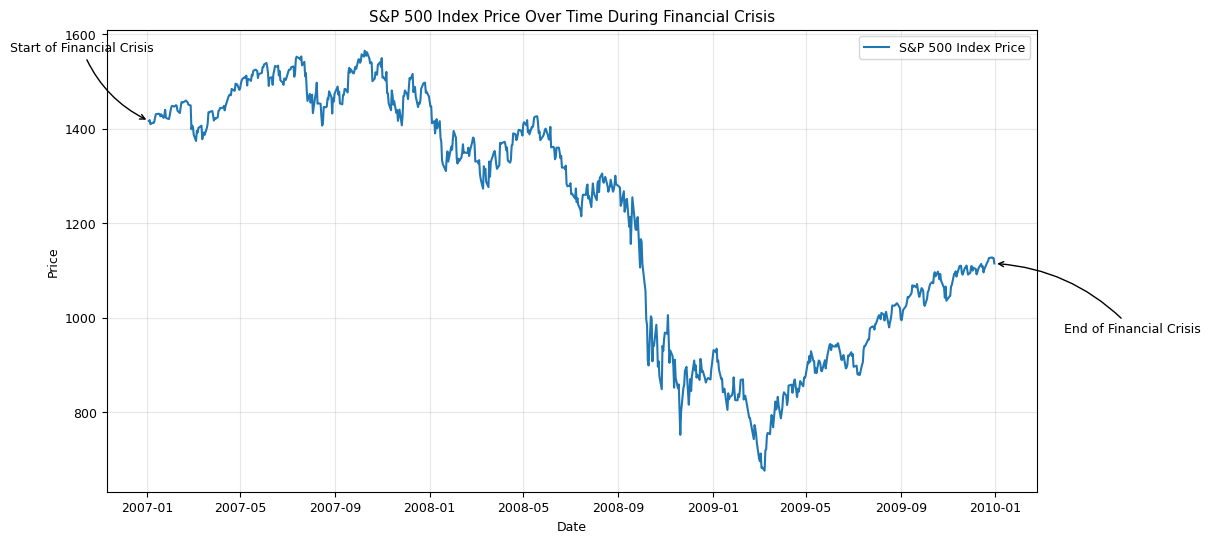

In [ ]:

crisis_start_date = "2007-01-01"
crisis_end_date = "2009-12-31"
# Find the closest available date before the specified start date of the financial crisis
crisis_start_date = sp500_total_price.index[sp500_total_price.index.get_loc(crisis_start_date, method='nearest')]

# Find the closest available date after the specified end date of the financial crisis
crisis_end_date = sp500_total_price.index[sp500_total_price.index.get_loc(crisis_end_date, method='nearest', tolerance='1D')]

# Plotting the S&P 500 Index Price Over Time for the Financial Crisis Period
plt.figure(figsize=(12, 6))
plt.plot(sp500_total_price.loc[crisis_start_date:crisis_end_date, 'Adj Close'], label='S&P 500 Index Price')

plt.annotate('Start of Financial Crisis', xy=(crisis_start_date, sp500_total_price.loc[crisis_start_date]['Adj Close']),
             xytext=(-100, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate('End of Financial Crisis', xy=(crisis_end_date, sp500_total_price.loc[crisis_end_date]['Adj Close']),
             xytext=(50, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.title('S&P 500 Index Price Over Time During Financial Crisis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Average Percentage Change by Industry during Financial Crisis

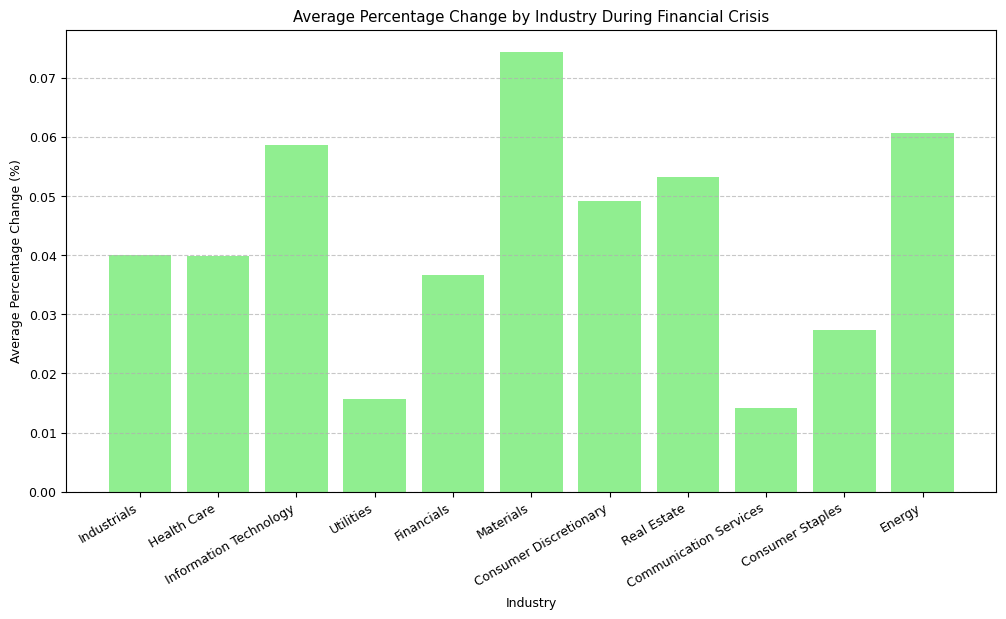

In [ ]:
industry_sectors = sp500_df['GICS Sector'].unique()

# Calculate the average percentage change for each industry sector during the crisis period
average_percentage_change = {}
for sector in industry_sectors:
    # Get the stocks belonging to the current sector
    sector_stocks = [stock for stock in sp500_df[sp500_df['GICS Sector'] == sector]['Symbol'] if stock in price.columns]
    # Filter the price data for these stocks and the crisis period
    sector_price_data = price.loc[crisis_start_date:crisis_end_date, sector_stocks]
    # Calculate the percentage change for the sector
    sector_percentage_change = sector_price_data.pct_change().mean().mean() * 100
    # Store the average percentage change for the sector
    average_percentage_change[sector] = sector_percentage_change

plt.figure(figsize=(12, 6))
plt.bar(industry_sectors, [average_percentage_change.get(sector, 0) for sector in industry_sectors], color='lightgreen')
plt.title('Average Percentage Change by Industry During Financial Crisis')
plt.xlabel('Industry')
plt.ylabel('Average Percentage Change (%)')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Correlation heatmap between top Information Technology Companies

In [ ]:
key_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']

# Filter the price data for the crisis period and key stocks
crisis_price_data = price.loc[crisis_start_date:crisis_end_date, key_stocks
correlation_matrix = crisis_price_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key S&P 500 Stocks During Financial Crisis')
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()


SyntaxError: '[' was never closed (<ipython-input-38-95cf48ba8cdb>, line 4)

# Sujasna

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download XLK data from Yahoo Finance
xlk_df = yf.download("XLK")

# Filter the data to the financial crisis period
crisis_start = "2007-01-01"
crisis_end = "2008-12-31"
xlk_crisis = xlk_df.loc[crisis_start:crisis_end]


#**Bar chart of the Trading volume**

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(xlk_crisis.index, xlk_crisis['Volume'], label='XLK Trading Volume')
plt.title('XLK Trading Volume During the Financial Crisis')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

#**Volatility Comparison of XLK and SPY During the Financial Crisis**

In [ ]:
# Ensure all necessary packages are installed
!pip install yfinance plotly pandas

import yfinance as yf
import pandas as pd
import plotly.express as px

# Downloading the data for XLK and SPY
xlk_df = yf.download('XLK', start='2007-01-01', end='2009-12-31')
spy_df = yf.download('SPY', start='2007-01-01', end='2009-12-31')

# Calculating daily returns
xlk_df['Returns'] = xlk_df['Close'].pct_change()
spy_df['Returns'] = spy_df['Close'].pct_change()

# Calculating volatility as the standard deviation of returns
xlk_volatility = xlk_df['Returns'].std()
spy_volatility = spy_df['Returns'].std()

# Dictionary mapping symbols to full names
full_names = {
    'XLK': 'Technology Select Sector SPDR Fund',
    'SPY': 'SPDR S&P 500 ETF Trust'
}

# Create a DataFrame for plotting
data = {
    'ETF': ['XLK', 'SPY'],
    'Volatility': [xlk_volatility, spy_volatility]
}

df = pd.DataFrame(data)
df['ETF'] = df['ETF'].map(full_names)  # Replace symbols with full names

# Create an interactive bar chart using Plotly
fig = px.bar(df, x='ETF', y='Volatility', color='ETF', title='Volatility Comparison of XLK and SPY During the Financial Crisis')
fig.update_layout(bargap=0.6)

# Show the plot
fig.show ()



#**Comparative Growth: Cumulative Returns of XLK and SPY from Post-Financial Crisis to Present**

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Define the tickers and the time period of interest
tickers = ["XLK", "SPY"]
start_date = "2009-12-31"  # End of the financial crisis
end_date = "2023-12-31"  # Up to the most recent complete year

# Download historical data for the specified tickers and date range
data = yf.download(tickers, start=start_date, end=end_date)

# Calculate the cumulative returns for each ticker
cumulative_returns = (data['Adj Close'].pct_change() + 1).cumprod() - 1

# Create an area plot for the cumulative returns
plt.figure(figsize=(14, 7))
plt.stackplot(cumulative_returns.index, cumulative_returns['XLK'], labels=['XLK'], alpha=0.5)
plt.stackplot(cumulative_returns.index, cumulative_returns['SPY'], labels=['SPY'], alpha=0.5)

# Add titles and labels
plt.title('Post-Financial Crisis Cumulative Returns of XLK and SPY')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))  # Convert to percentage

# Add legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()



## Beginning of the NVDA Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import param
import panel as pn

# 3/19/2024
# Sijie Hu

# 1 EPS df
dfepsnvda = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/NVDAPE.csv')
dfepsnvda['Date'] = pd.to_datetime(dfepsnvda['Date'])

dfepsmsft = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/MSFTPE.csv')
dfepsmsft['Date'] = pd.to_datetime(dfepsmsft['Date'])

dfepsgoog = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/GOOGPE.csv')
dfepsgoog['Date'] = pd.to_datetime(dfepsgoog['Date'])

NVDA_eps = dfepsnvda.copy()
MSFT_eps = dfepsmsft.copy()
GOOG_eps = dfepsgoog.copy()

# 2 Price nvda
dfnvda1 = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/NVDA20.csv')
dfnvda1['Date'] = pd.to_datetime(dfnvda1['Date'])

dfnvda2 = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/NVDA08.csv')
dfnvda2['Date'] = pd.to_datetime(dfnvda2['Date'])

# 2 Price others
dfspy1 = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/SPY20.csv')
dfxlk1 = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/XLK20.csv')
dfmsft = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/MSFT20.csv')
dfspy1['Date'] = pd.to_datetime(dfspy1['Date'])
dfxlk1['Date'] = pd.to_datetime(dfxlk1['Date'])
dfmsft['Date'] = pd.to_datetime(dfmsft['Date'])

NVDA1_price = dfnvda1.copy()
SPY1_price = dfspy1.copy()
XLK1_price = dfxlk1.copy()

dfspy2 = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/SPY08.csv')
dfxlk2 = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/XLK08.csv')
dfspy2['Date'] = pd.to_datetime(dfspy2['Date'])
dfxlk2['Date'] = pd.to_datetime(dfxlk2['Date'])

NVDA2_price = dfnvda2.copy()
SPY2_price = dfspy2.copy()
XLK2_price = dfxlk2.copy()

dfsp500 = pd.read_csv('https://raw.githubusercontent.com/omlove28/sp500/main/SP500.csv', parse_dates=['Date added'])
COMP = dfsp500[dfsp500['Symbol'].isin(['NVDA','MSFT','AAPL','GOOG'])].copy()

In [ ]:
# import yfinance as yf
import json
import requests

r1 = requests.get('https://raw.githubusercontent.com/omlove28/sp500/main/NVDA.json')
NVDA_info = json.loads(r1.text)

r2 = requests.get('https://raw.githubusercontent.com/omlove28/sp500/main/GOOG.json')
GOOG_info = json.loads(r2.text)

r3 = requests.get('https://raw.githubusercontent.com/omlove28/sp500/main/MSFT.json')
MSFT_info = json.loads(r3.text)

FINANCIAL = pd.DataFrame(
    {'symbol': ['NVDA', 'MSFT', 'GOOG'],
     'marketCap': [NVDA_info['marketCap'], MSFT_info['marketCap'], GOOG_info['marketCap']],
     'currentPrice': [NVDA_info['currentPrice'], MSFT_info['currentPrice'], GOOG_info['currentPrice']],
     'fiftyTwoWeekLow': [NVDA_info['fiftyTwoWeekLow'], MSFT_info['fiftyTwoWeekLow'], GOOG_info['fiftyTwoWeekLow']],
     'fiftyTwoWeekHigh': [NVDA_info['fiftyTwoWeekHigh'], MSFT_info['fiftyTwoWeekHigh'], GOOG_info['fiftyTwoWeekHigh']],
     'trailingPE': [NVDA_info['trailingPE'], MSFT_info['trailingPE'], GOOG_info['trailingPE']],
     'forwardPE': [NVDA_info['forwardPE'], MSFT_info['forwardPE'], GOOG_info['forwardPE']],
    }
)

##NVDA enter S&P500 compared to others-

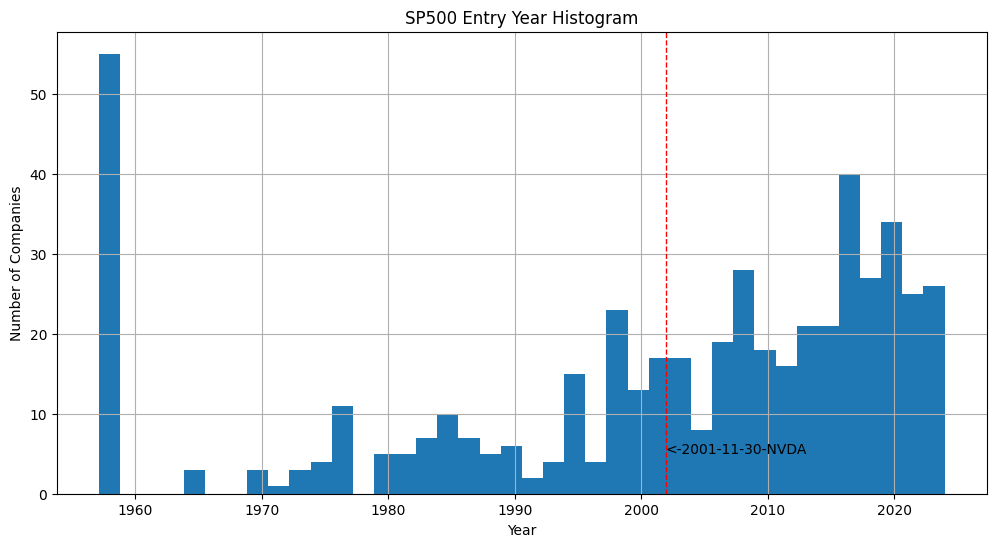

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

dfsp500.hist(ax=ax, column='Date added', bins=40)
ax.set_title('SP500 Entry Year Histogram')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Companies')
ax.text(COMP[COMP['Symbol']=='NVDA']['Date added'], 5, '<-2001-11-30-NVDA')
ax.axvline(pd.Timestamp('2001-11-30'), ls='--', lw=1.0, color='red')

##NVDA price compared to S&P500 in Covid period

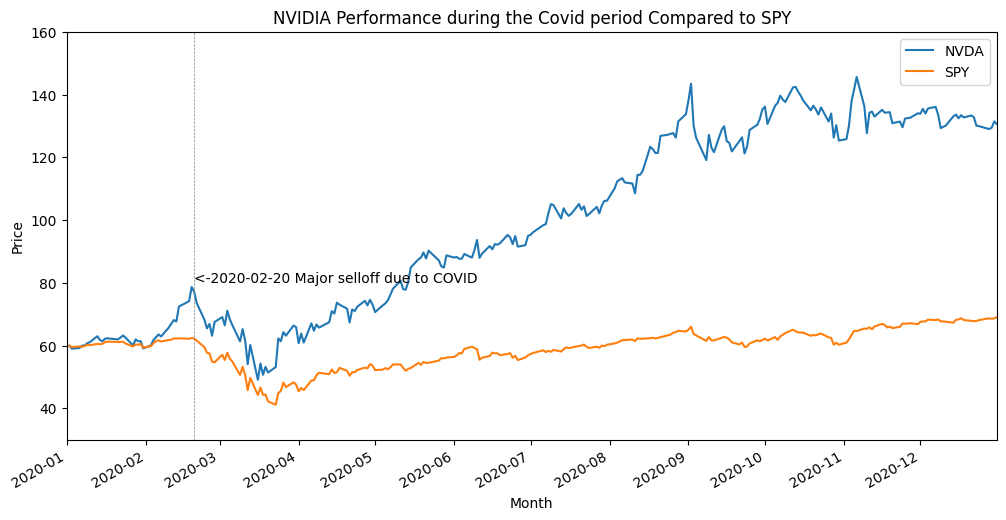

In [ ]:
# first we need to scale dfs to the same value in the beginning


X_spy = NVDA1_price.loc[0]['Close'] / SPY1_price.loc[0]['Close']
SPY1_price['Close multiplied'] = SPY1_price['Close'] * X_spy

fig, ax = plt.subplots(figsize=(12,6))

NVDA1_price.plot(ax=ax, x='Date', y='Close', label='NVDA')
SPY1_price.plot(ax=ax, x='Date', y='Close multiplied', label='SPY')

ax.set_title('NVIDIA Performance during the Covid period Compared to SPY')
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-31'))
ax.set_ylim(30,160)
ax.text(pd.Timestamp('2020-02-20'), 80, '<-2020-02-20 Major selloff due to COVID')
ax.axvline(pd.Timestamp('2020-02-20'), ls='--', lw=0.5, color='grey')

##NVDA price compared to Information Technology sector in Covid period-

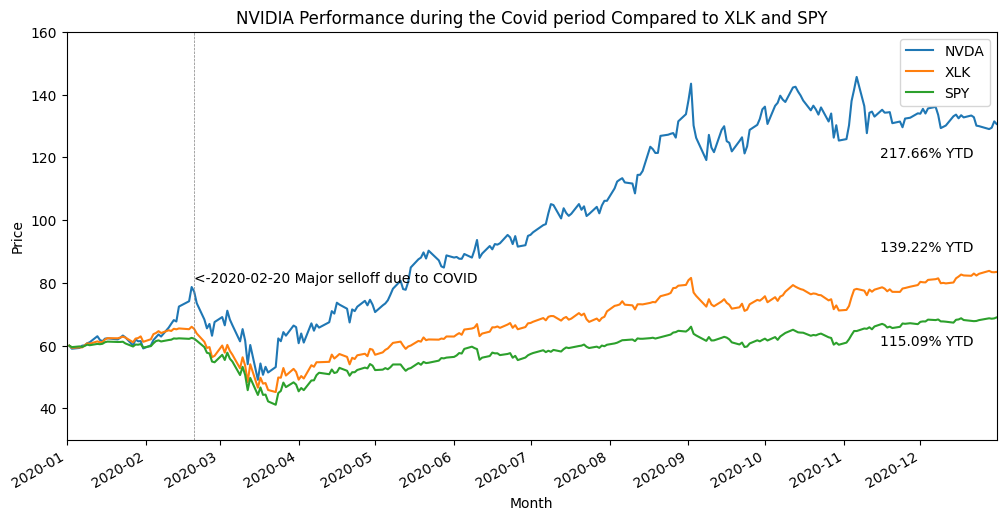

In [ ]:
# first we need to scale dfs to the same value in the beginning

X_spy = NVDA1_price.loc[0]['Close'] / SPY1_price.loc[0]['Close']
SPY1_price['Close multiplied'] = SPY1_price['Close'] * X_spy
X_xlk = NVDA1_price.loc[0]['Close'] / XLK1_price.loc[0]['Close']
XLK1_price['Close multiplied'] = XLK1_price['Close'] * X_xlk

fig, ax = plt.subplots(figsize=(12,6))

NVDA1_price.plot(ax=ax, x='Date', y='Close', label='NVDA')
XLK1_price.plot(ax=ax, x='Date', y='Close multiplied', label='XLK')
SPY1_price.plot(ax=ax, x='Date', y='Close multiplied', label='SPY')

ax.set_title('NVIDIA Performance during the Covid period Compared to XLK and SPY')
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-31'))
ax.set_ylim(30,160)
ax.text(pd.Timestamp('2020-02-20'), 80, '<-2020-02-20 Major selloff due to COVID')

# what is the return of the year?
NVDA_return = NVDA1_price.loc[252]['Close'] / NVDA1_price.loc[0]['Close'] * 100
SPY_return = SPY1_price.loc[252]['Close'] / SPY1_price.loc[0]['Close'] * 100
XLK_return = XLK1_price.loc[252]['Close'] / XLK1_price.loc[0]['Close'] * 100

ax.text(pd.Timestamp('2020-11-15'), 120, f'{NVDA_return:.2f}% YTD')
ax.text(pd.Timestamp('2020-11-15'), 60, f'{SPY_return:.2f}% YTD')
ax.text(pd.Timestamp('2020-11-15'), 90, f'{XLK_return:.2f}% YTD')
ax.axvline(pd.Timestamp('2020-02-20'), ls='--', lw=0.5, color='grey')

##NVDA price compared to S&P500 in Financial crisis period-

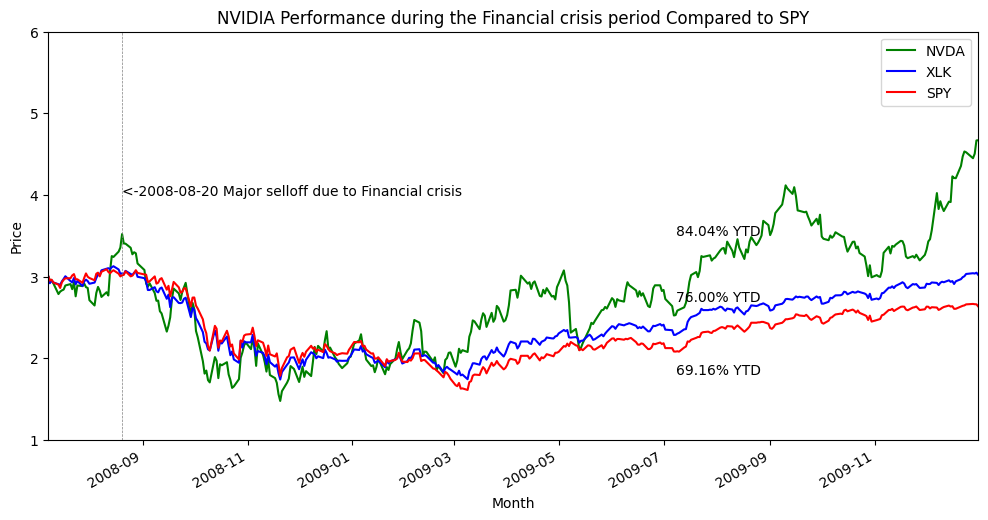

In [ ]:
# first we need to scale dfs to the same value in the beginning
# 9/15/2008

X_spy = NVDA2_price.loc[380]['Close'] / SPY2_price.loc[380]['Close']
SPY2_price['Close multiplied'] = SPY2_price['Close'] * X_spy
X_xlk = NVDA2_price.loc[380]['Close'] / XLK2_price.loc[380]['Close']
XLK2_price['Close multiplied'] = XLK2_price['Close'] * X_xlk

fig, ax = plt.subplots(figsize=(12,6))

NVDA2_price.plot(ax=ax, x='Date', y='Close', label='NVDA', color='g')
XLK2_price.plot(ax=ax, x='Date', y='Close multiplied', label='XLK', color='b')
SPY2_price.plot(ax=ax, x='Date', y='Close multiplied', label='SPY', color='r')

ax.set_title('NVIDIA Performance during the Financial crisis period Compared to SPY')
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_xlim(pd.Timestamp('2008-07-08'), pd.Timestamp('2009-12-31'))
ax.set_ylim(1,6)
ax.text(pd.Timestamp('2008-08-20'), 4, '<-2008-08-20 Major selloff due to Financial crisis')

# what is the return of the year?
NVDA_return = NVDA2_price.loc[632]['Close'] / NVDA2_price.loc[380]['Close'] * 100
SPY_return = SPY2_price.loc[632]['Close'] / SPY2_price.loc[380]['Close'] * 100
XLK_return = XLK2_price.loc[632]['Close'] / XLK2_price.loc[380]['Close'] * 100

ax.text(pd.Timestamp('2009-07-08'), 3.5, f'{NVDA_return:.2f}% YTD')
ax.text(pd.Timestamp('2009-07-08'), 1.8, f'{SPY_return:.2f}% YTD')
ax.text(pd.Timestamp('2009-07-08'), 2.7, f'{XLK_return:.2f}% YTD')
ax.axvline(pd.Timestamp('2008-08-20'), ls='--', lw=0.5, color='grey')

##NVDA performance to post covid period-

Text(2023-08-01 00:00:00, 50, '191.29% Return')

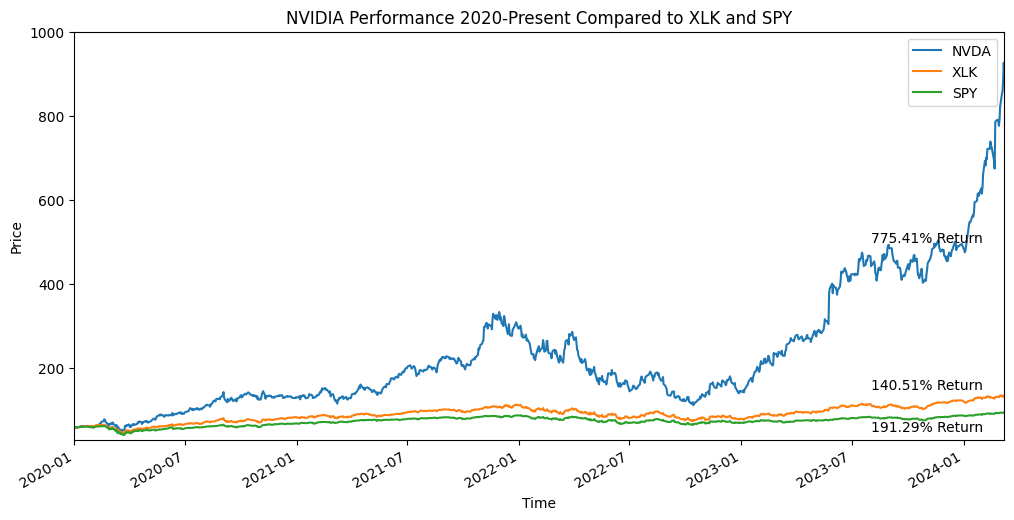

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

NVDA1_price.plot(ax=ax, x='Date', y='Close', label='NVDA')
XLK1_price.plot(ax=ax, x='Date', y='Close multiplied', label='XLK')
SPY1_price.plot(ax=ax, x='Date', y='Close multiplied', label='SPY')

ax.set_title('NVIDIA Performance 2020-Present Compared to XLK and SPY')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2024-03-08'))
ax.set_ylim(30,1000)

NVDA_return = NVDA1_price.loc[900]['Close'] / NVDA1_price.loc[0]['Close'] * 100
SPY_return = SPY1_price.loc[900]['Close'] / SPY1_price.loc[0]['Close'] * 100
XLK_return = XLK1_price.loc[900]['Close'] / XLK1_price.loc[0]['Close'] * 100

ax.text(pd.Timestamp('2023-08-01'), 500, f'{NVDA_return:.2f}% Return')
ax.text(pd.Timestamp('2023-08-01'), 150, f'{SPY_return:.2f}% Return')
ax.text(pd.Timestamp('2023-08-01'), 50, f'{XLK_return:.2f}% Return')

##Other comparison-

Text(0, 0.5, 'P/E')

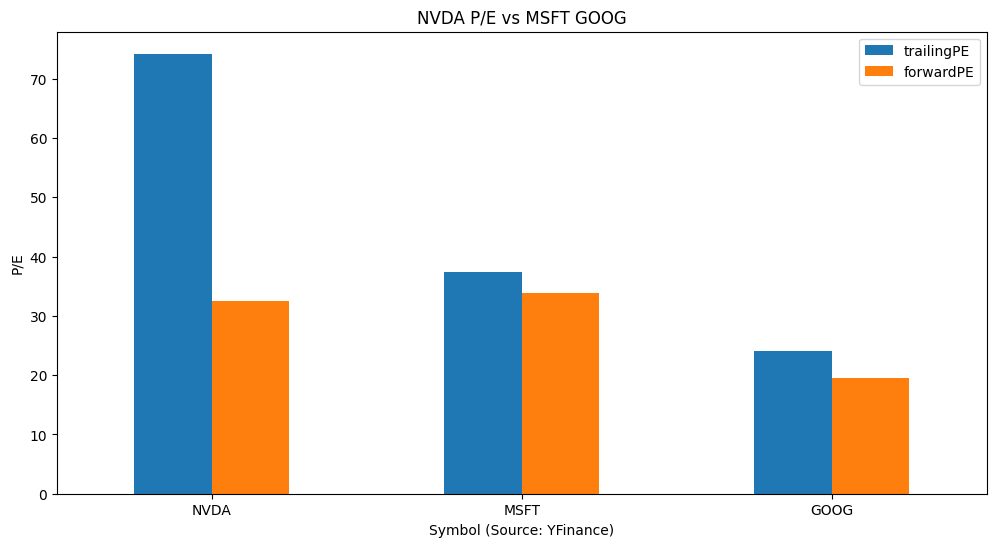

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

# FINANCIAL.drop(columns=['marketCap',
#                     'trailingPE',
#                     'forwardPE']).plot.bar(ax=ax[0], x='symbol', rot=0)

FINANCIAL.drop(columns=['marketCap',
                    'currentPrice',
                    'fiftyTwoWeekLow',
                    'fiftyTwoWeekHigh']).plot.bar(ax=ax, x='symbol', rot=0)

# ax[0].set_title('NVDA Stock Price vs MSFT GOOG')
# ax[0].set_xlabel('Symbol (Source: YFinance)')
# ax[0].set_ylabel('Price')

ax.set_title('NVDA P/E vs MSFT GOOG')
ax.set_xlabel('Symbol (Source: YFinance)')
ax.set_ylabel('P/E')